In [50]:
import numpy as np
import pint
import matplotlib.pyplot as plt
from scipy.constants import h, k

In [51]:
ureg = pint.UnitRegistry()

In [52]:
def set_style():
    """Set matplotlib style."""
    """Could instead use a .mplstyle file, but that requires everyone to have it locally"""
    tex_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 12pt font in plots, to match 12pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
    }

    plt.rcParams.update(tex_fonts)

In [53]:
set_style()

In [54]:
# Constants
h = h * ureg.joule * ureg.second
k = k * ureg.joule / ureg.kelvin
T = 310 * ureg.kelvin

In [55]:
def M_z(t, T1):
    return 1- np.exp(-t/T1)

In [56]:
t = np.arange(0, 6, 0.01)

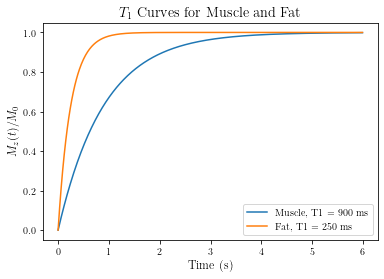

In [57]:
plt.plot(t, M_z(t, 900E-3), label='Muscle, T1 = 900 ms')
plt.plot(t, M_z(t, 250E-3), label='Fat, T1 = 250 ms')
plt.xlabel('Time (s)')
plt.ylabel('$M_z(t)/M_0$')
plt.legend()
plt.title("$T_1$ Curves for Muscle and Fat")
plt.savefig('T1_curves.png', dpi=300)

In [58]:
muscle = M_z(t, 900E-3)
fat = M_z(t, 250E-3)
t[np.argmax(fat-muscle)]

0.44

In [59]:
def s(t):
    OMEGA_0 = 42.7E6*2*np.pi * 5E-6
    T2 = 0.02
    return np.exp(-t/T2) * np.sin(OMEGA_0 * t)

In [60]:
t = np.arange(0, 0.15, 5E-6)

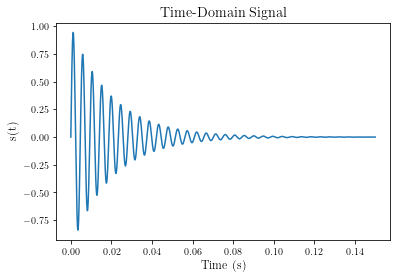

In [61]:
plt.plot(t, s(t))
plt.xlabel('Time (s)')
plt.ylabel('s(t)')
plt.title('Time-Domain Signal')
plt.savefig('time_domain.jpg', dpi=300)

In [62]:
def avg_signal(N):
    avg_signal = np.zeros(len(t))
    for i in range(N):
        noise = np.random.normal(0, 0.1, len(t))
        avg_signal += s(t) + noise
    return avg_signal

In [63]:
def graph_avg(N):
    plt.plot(t, avg_signal(N))
    plt.xlabel('Time (s)')
    plt.ylabel('s(t)')
    plt.title(f'{N}-Averaged Time-Domain Signal w/ Noise')
    plt.savefig(f'{N}_avg.png', dpi=300)

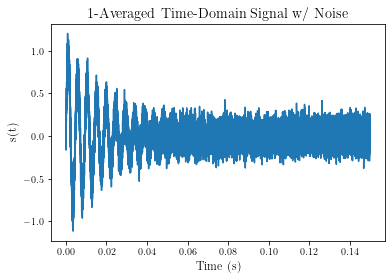

In [64]:
graph_avg(1)

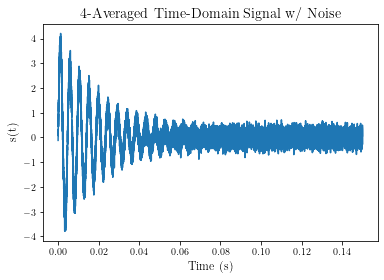

In [65]:
graph_avg(4)

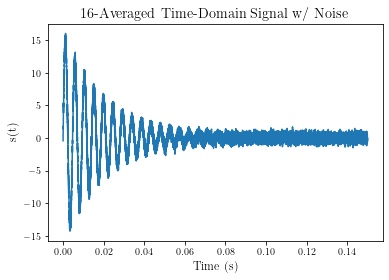

In [66]:
graph_avg(16)

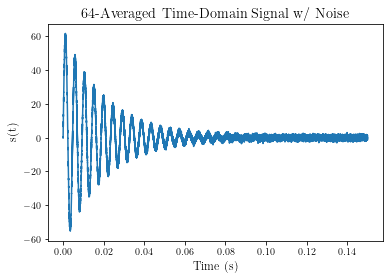

In [67]:
graph_avg(64)

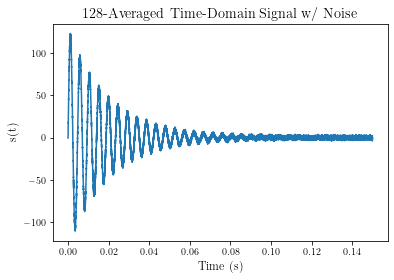

In [68]:
graph_avg(128)